In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv("Mercury2x.csv")
mercury_cartesian = data[['X','Y','Z']].to_numpy()

In [ ]:
def draw_vector(vector, ax, scale=1):
    vector = vector
    origin = np.array([0,0,0])
    vec = np.vstack((origin, vector))*scale
    ax.plot(vec[:,0],vec[:,1],vec[:,2])

In [ ]:
def generate_plane_vector(data, n=1000,local=True):
    """
    Takes cartesian coordinates
    produces a normal vector in cartesian
    """
    unit_plane = np.array([0.0,0.0,0.0])
    
    for i in range(n):
        index1, index2, index3 = 0,0,0
        if local:
            ## Get three points that are spatially close together
            ## This method seems better and more consistent
            index1 = np.random.randint(0, len(data)-4)
            index2 = index1 + 1
            index3 = index2 + 1
        else:
            ## Get three random points
            index1 = np.random.randint(0, len(data))
            index2 = np.random.randint(0, len(data))
            index3 = np.random.randint(0, len(data))
        
        p1 = data[index1,0:3]
        p2 = data[index2,0:3]
        p3 = data[index3,0:3]
        
        vec1 = p2-p1
        vec2 = p3-p1
        plane_vector = np.cross(vec1, vec2)
        plane_vector = plane_vector/np.linalg.norm(plane_vector)
        
        unit_plane += plane_vector
    
    unit_plane = unit_plane/n
    unit_plane = unit_plane/np.linalg.norm(unit_plane)
    return unit_plane

In [ ]:
def Rotate_z(data, theta):
    """
    Rotate data theta clockwise around z axis
    """
    Rz = np.array([[np.cos(theta),-np.sin(theta), 0],
                 [np.sin(theta), np.cos(theta), 0],
                 [0, 0, 1]])
    new_data = Rz @ data.T
    return new_data.T

def Rotate_y(data, theta):
    """
    Rotate data theta clockwise around y axis
    """
    Ry = np.array([[np.cos(theta),0, np.sin(theta)],
                 [0,1,0],
                 [-np.sin(theta), 0, np.cos(theta)]])
    new_data = Ry @ data.T
    return new_data.T

[-1.66533454e-16 -5.55111512e-17  1.00000000e+00]
[-1.66533454e-16  4.16333634e-17  1.00000000e+00]
[-1.11022302e-16 -8.32667268e-17  1.00000000e+00]
[1.11022302e-16 0.00000000e+00 1.00000000e+00]
[ 5.55111512e-17 -2.77555756e-17  1.00000000e+00]
[ 0.00000000e+00 -2.77555756e-17  1.00000000e+00]
[ 1.11022302e-16 -6.93889390e-17  1.00000000e+00]
[-5.55111512e-17 -6.93889390e-17  1.00000000e+00]
[1.66533454e-16 2.77555756e-17 1.00000000e+00]
[ 5.55111512e-17 -5.55111512e-17  1.00000000e+00]


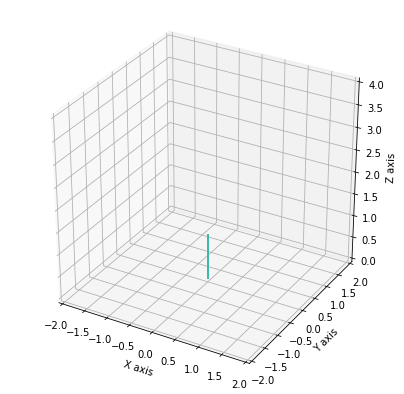

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
for i in range(10):
    normal = generate_plane_vector(mercury_cartesian,local=True)
    phi = np.arccos(normal[2])
    theta = np.arctan(normal[1]/normal[0])
    normal_prime = Rotate_z(normal, -theta)
    normal_prime = Rotate_y(normal_prime, -phi)
    print(normal_prime)
    draw_vector(normal_prime, ax)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 4)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

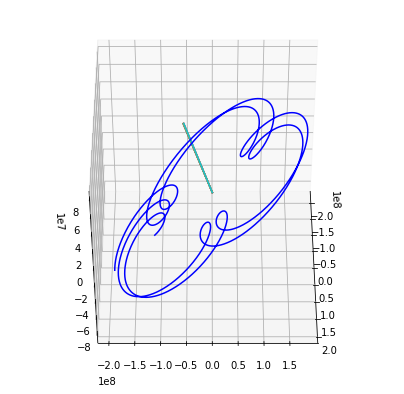

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
for i in range(10):
    normal = generate_plane_vector(mercury_cartesian,local=True)
    draw_vector(normal,ax,scale=100000000)
ax.plot(mercury_cartesian[:,0],mercury_cartesian[:,1],mercury_cartesian[:,2],'b')
ax.view_init(45,0)
plt.show()

In [ ]:
normal = generate_plane_vector(mercury_cartesian,local=True)
phi = np.arccos(normal[2])
theta = np.arctan(normal[1]/normal[0])

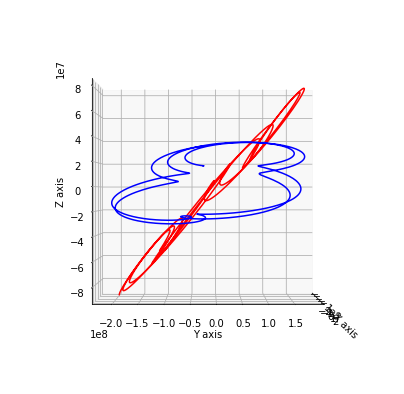

In [ ]:
normal_prime = Rotate_z(normal, -theta)
normal_prime = Rotate_y(normal_prime, -phi)

mercury_flat = Rotate_z(mercury_cartesian, -theta)
mercury_flat = Rotate_y(mercury_flat, -phi)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
draw_vector(normal_prime, ax, scale=20000000)

ax.plot(mercury_cartesian[:,0],mercury_cartesian[:,1],mercury_cartesian[:,2],'r')
ax.plot(mercury_flat[:,0],mercury_flat[:,1],mercury_flat[:,2],'b')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

ax.view_init(0,0)
plt.show()

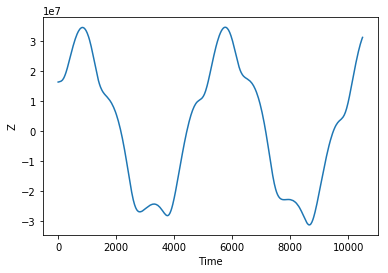

In [ ]:
plt.plot(mercury_flat[:,2])
plt.xlabel("Time")
plt.ylabel("Z")
plt.show()

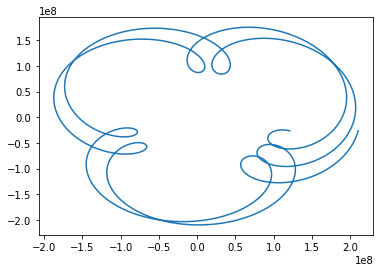

In [ ]:
plt.plot(mercury_flat[:,0], mercury_flat[:,1])
plt.show()